In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.special import gamma
from scipy.optimize import fsolve
from tqdm import tqdm
from bokeh.layouts import gridplot
from bokeh.models import Range1d
from bokeh.plotting import figure, show

In [126]:
next_infection_i = 1
lmb = 1.5
infected_indices = [0,1]
active_tau = [0,0]
L = []
b=2
a = 3
t_c = 0
Q_unsorted = np.random.exponential(1,50)
Q = np.sort(Q_unsorted)

P = np.random.uniform(0,1,51)
p = 0.5
n=50
m=1
T =3
I = [3]*(n+m)

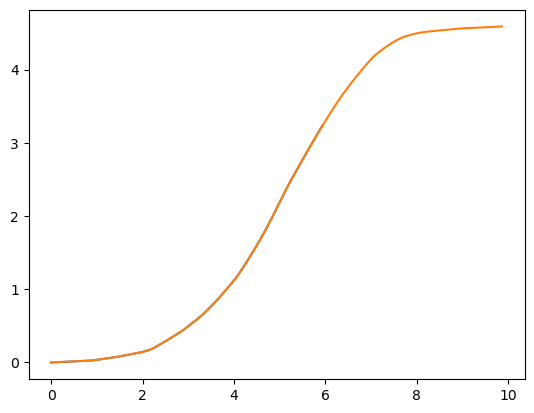

In [328]:
r1 = SIRSelke_constant_pulse(n,m,Q,I,lmb,4,P,0)
plt.plot(r1[0],r1[1])
r2 = SIRSelke_constant_pulse2(n,m,Q,I,lmb,4,P,0)


plt.plot(r2[0],r2[1])
plt.show()

In [310]:
def SIRSelke_constant_reduction(n,m,Q,I,lmb,T,D,B):    
    A = 0 
    t = 0
    
    t_v = [0]
    A_v = [0]
    I_v = [m]
    
    
    t_inf = [0]*(n+m)
    t_recov = [0]*(n+m)

    susceptible_indices = [k for k in range(m,n+m)]
    infected_indices = [k for k in range(m)]
    recovered_indices = []
    
    active_tau = [np.inf]*(n+m)
    
    for k in infected_indices:
        active_tau[k] = I[k]
    

    next_event_tau = {"infection": (Q[0]-A)/((lmb/n)*len(infected_indices)),
                      "recovery": min(active_tau),
                      "start intervention": T,
                      "end intervention": T+D}
    next_event_i = {"infection": m,
                    "recovery": active_tau.index(next_event_tau["recovery"])}
    
    
    
    effective_lmb = lmb

    
    
    
    while len(infected_indices)>0:
        
        dt = min(next_event_tau.values())
        
        active_tau = [tau-dt for tau in active_tau] 
        A+= (effective_lmb/n)*dt*len(infected_indices)
        t+=dt
        next_event_type = [i for i in next_event_tau.keys() if next_event_tau[i] == dt][0]

        if next_event_type ==  "start intervention":
            #print("pulse")
            effective_lmb = lmb/B
            next_event_tau["start intervention"] = np.inf

            
        elif next_event_type ==  "end intervention":
            #print("unpulse")
            effective_lmb = lmb
            next_event_tau["end intervention"] = np.inf
 
        
        elif next_event_type ==  "recovery":
            #print("Recovery")
            t_recov[next_event_i["recovery"]] = t
            recovered_indices.append(next_event_i["recovery"])
            infected_indices.remove(next_event_i["recovery"])
            active_tau[next_event_i["recovery"]] = np.inf

            
        
            
        elif next_event_type ==  "infection":
            #print("Infection")     
            t_inf[next_event_i["infection"]] = t
            infected_indices.append(next_event_i["infection"])
            active_tau[next_event_i["infection"]]  = I[next_event_i["infection"]]
            next_event_i["infection"] += 1
            if next_event_i["infection"]==n+1:
                next_event_tau["infection"]= np.inf
            
            
        
        if next_event_tau["infection"] <np.inf and len(infected_indices)!=0:
                next_event_tau["infection"] = (Q[next_event_i["infection"]-m]-A)/((effective_lmb/n)*len(infected_indices))
        next_event_tau["recovery"] = min(active_tau)
        next_event_i["recovery"] = active_tau.index(next_event_tau["recovery"])        
        next_event_tau["end intervention"] = next_event_tau["end intervention"] -dt
        next_event_tau["start intervention"] = next_event_tau["start intervention"] -dt
                
        t_v.append(t)
        A_v.append(A)
        I_v.append(len(infected_indices))
        
        #if A_prev>A:
        #    print("A =",A) 
        #print(active_tau)
        #print("")

        #print("t=",t,"\n")

    return(t_v,A_v,I_v,t_inf,t_recov,recovered_indices)
            

In [326]:
def SIRSelke_constant_pulse(n,m,Q,I,lmb,T,P,p):
    A = 0 
    t = 0
    
    t_v = [0]
    A_v = [0]
    I_v = [m]
    
    
    t_inf = [0]*(n+m)
    t_recov = [0]*(n+m)

    susceptible_indices = [k for k in range(m,n+m)]
    infected_indices = [k for k in range(m)]
    recovered_indices = []
    
    active_tau = [np.inf]*(n+m)
    
    for k in infected_indices:
        active_tau[k] = I[k]
    

    next_event_tau = {"infection": (Q[0]-A)/((lmb/n)*len(infected_indices)),
                      "recovery": min(active_tau),
                      "start intervention": T}
    next_event_i = {"infection": m,
                    "recovery": active_tau.index(next_event_tau["recovery"])}
    
    
    
    effective_lmb = lmb

    
    
    
    while len(infected_indices)>0:
        
        dt = min(next_event_tau.values())
        
        active_tau = [tau-dt for tau in active_tau] 
        A+= (effective_lmb/n)*dt*len(infected_indices)
        t+=dt
        next_event_type = [i for i in next_event_tau.keys() if next_event_tau[i] == dt][0]

        if next_event_type ==  "start intervention":
            #print("pulse")
            for i in infected_indices:
                if P[i]<p:
                    indices_spotted.append(i)
                    
                    active_tau[i] = np.inf
                    
            indices_spotted = []       
            for i in indices_spotted:
                recovered_indices.append(i)
                infected_indices.remove(i)
                t_recov[i] = t
            next_event_tau["start intervention"] = np.inf

            
 
        
        elif next_event_type ==  "recovery":
            #print("Recovery")
            t_recov[next_event_i["recovery"]] = t
            recovered_indices.append(next_event_i["recovery"])
            infected_indices.remove(next_event_i["recovery"])
            active_tau[next_event_i["recovery"]] = np.inf

            
        
            
        elif next_event_type ==  "infection":
            #print("Infection")     
            t_inf[next_event_i["infection"]] = t
            infected_indices.append(next_event_i["infection"])
            active_tau[next_event_i["infection"]]  = I[next_event_i["infection"]]
            next_event_i["infection"] += 1
            if next_event_i["infection"]==n+1:
                next_event_tau["infection"]= np.inf
            
            
        
        if next_event_tau["infection"] <np.inf and len(infected_indices)!=0:
                next_event_tau["infection"] = (Q[next_event_i["infection"]-m]-A)/((effective_lmb/n)*len(infected_indices))
        next_event_tau["recovery"] = min(active_tau)
        next_event_i["recovery"] = active_tau.index(next_event_tau["recovery"])    
        next_event_tau["start intervention"] = next_event_tau["start intervention"] -dt
                
        t_v.append(t)
        A_v.append(A)
        I_v.append(len(infected_indices))
        
        #if A_prev>A:
        #    print("A =",A) 
        #print(active_tau)
        #print("")

        #print("t=",t,"\n")

    return(t_v,A_v,I_v,t_inf,t_recov,recovered_indices)
            
            

In [313]:
#Doesn't Work
def SIRSelke_Weibull_pulse(n,m,Q,lmb,a,b,T,P,p):
    """Function that runs a Sellke construction of a simple SIR model with a Weibull shaped infectivity profile. Includes a constant testing rate
    n - number of initial susceptibles
    m - number of initial infectives
    Q - n length vector with the individual thresholds of each of the susceptibles
    I - n+m length vector of the infectious periods of each of the individuals in the simulation"""
    print(Q)
    A = 0 
    t = 0
    
    t_v = [0]
    A_v = [0]
    
    pulsed = False
    
    t_inf = [0]*(n+m)

    susceptible_indices = [k for k in range(m,n+m)]
    infected_indices = [k for k in range(m)]
    recovered_indices = []
    

    next_infection_i = m
    f = lambda x: Q[next_infection_i-m] - (lmb/n)*sum([1-np.exp(-((x-t_inf[k])/b)**a) for k in infected_indices])
    #print("Check:",f(np.inf))
    if f(np.inf)>0.001:
        return(t_v,A_v,t_inf,recovered_indices)
    else:
        next_infection_time = fsolve(f,t+2*b*((a-1)/a)**(1/a))[0]
    
    #print("next infection:", next_infection_i)
    #print("Next infection time:",next_infection_time)
    #print(infected_indices)
    #print("t:", t, "\n")
    

    while len(infected_indices)>0:
        
        if ((T)<next_infection_time) and pulsed == False:
            #print("Pulse!")
            #print(infected_indices)
            #Pulse test        
            A += (lmb/n)*sum([np.exp(-((t-t_inf[k])/b)**a)-np.exp(-((T-t_inf[k])/b)**a) for k in infected_indices])
            t = T
            indices_spotted = []
            
           
            for i in infected_indices:
                if P[i]<p:
                    indices_spotted.append(i)
                    
                        
            for i in indices_spotted:
                recovered_indices.append(i)
                infected_indices.remove(i)
                
                
            
            if len(infected_indices)>0:
                f = lambda x: Q[next_infection_i-m] - (lmb/n)*sum([np.exp(-((t-t_inf[k])/b)**a)-np.exp(-((x-t_inf[k])/b)**a) for k in infected_indices])-A
                #print("Check:",f(np.inf))
                if f(np.inf)>0.001:
                    break
                else:
                    next_infection_time = fsolve(f,t+2*b*((a-1)/a)**(1/a))[0]-T
                
            pulsed = True
            #print(infected_indices)
        
            
        
            
        else:
            #print("Infection")
            #Next event is an infection
            
            
                
            A+= (lmb/n)*sum([np.exp(-((t-t_inf[k])/b)**a)-np.exp(-((t+next_infection_time-t_inf[k])/b)**a) for k in infected_indices])
            
            t = next_infection_time
            
            t_inf[next_infection_i-m] = t
            
            infected_indices.append(next_infection_i)
            susceptible_indices.remove(next_infection_i)
            
            next_infection_i += 1
            if len(infected_indices)>0:
                f = lambda x: Q[next_infection_i-m] - (lmb/n)*sum([np.exp(-((t-t_inf[k])/b)**a)-np.exp(-((x-t_inf[k])/b)**a) for k in infected_indices])-A
                #print("Check:",f(np.inf))
                if f(np.inf)>0.001:
                    break
                else:
                    next_infection_time = fsolve(f,t+2*b*((a-1)/a)**(1/a))[0]
                
            
            if next_infection_i>=m+n-1:
                    
                break
                
                
                
                
                
                
                
        t_v.append(t)
        A_v.append(A)
        #print("next infection:", next_infection_i)
        #print("Next infection time:",next_infection_time)
        #print(infected_indices)
        #print("t:", t, "\n")
        

    for i in infected_indices:
        recovered_indices.append(i)
        
    return(t_v,A_v,t_inf,recovered_indices)
            